In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [4]:
df.shape

(22524, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22524 non-null  int64 
 1   Date Created     22524 non-null  object
 2   Number of Likes  22524 non-null  int64 
 3   Source of Tweet  22524 non-null  object
 4   Tweet            22524 non-null  object
 5   Sentiment        22524 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [6]:
df.isnull( ).sum( )

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Twitter for iPhone'),
  Text(1, 0, 'Twitter for Android'),
  Text(2, 0, 'Twitter Web App'),
  Text(3, 0, 'TweetDeck'),
  Text(4, 0, 'Twitter for iPad'),
  Text(5, 0, 'Qualtrics Social Connect'),
  Text(6, 0, 'Hootsuite Inc.'),
  Text(7, 0, 'Buffer'),
  Text(8, 0, 'Instagram'),
  Text(9, 0, 'Tweetbot for iΟS')])

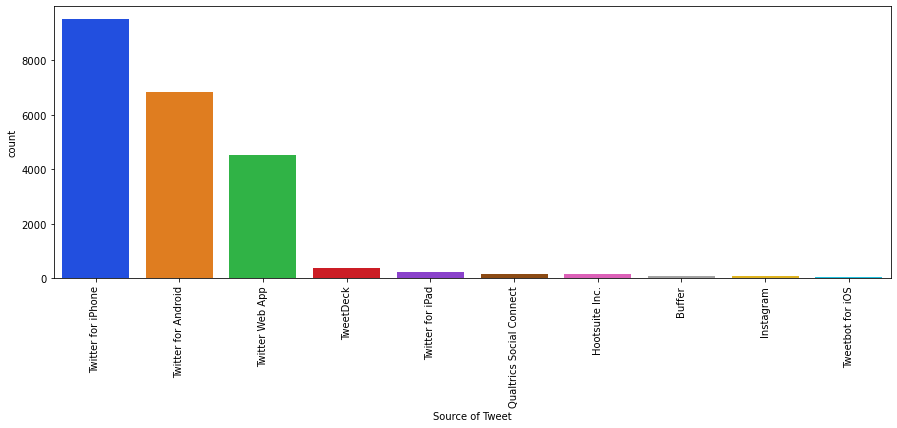

In [10]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Source of Tweet', data= df, palette='bright', 
              order = df['Source of Tweet'].value_counts(ascending = False).iloc[:10].index)
plt.xticks(rotation = 90)

(array([0, 1, 2]),
 [Text(0, 0, 'neutral'), Text(1, 0, 'positive'), Text(2, 0, 'negative')])

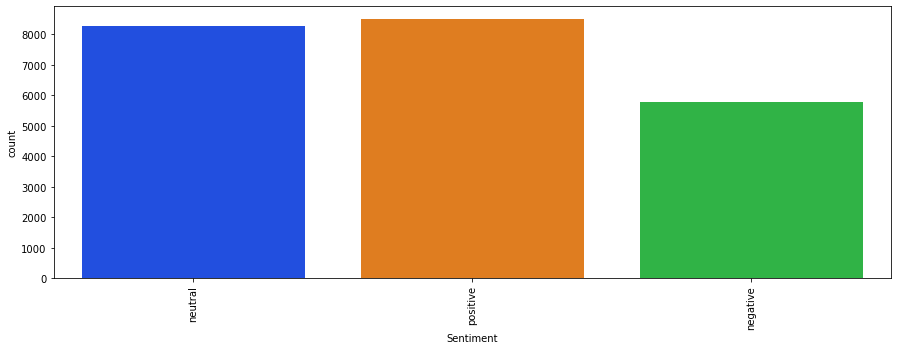

In [16]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Sentiment', data= df, palette='bright')
plt.xticks(rotation = 90)

In [17]:
df.drop(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet'], axis=1, inplace=True)

In [18]:
df.head()

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,neutral
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,Worth reading while watching #WorldCup2022 htt...,positive
3,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,"If the BBC cares so much about human rights, h...",negative


In [19]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [20]:
df['Sentiment'] = encode.fit_transform(df['Sentiment'])
df.head()

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,1
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,2
2,Worth reading while watching #WorldCup2022 htt...,2
3,Golden Maknae shinning bright\n\nhttps://t.co/...,2
4,"If the BBC cares so much about human rights, h...",0


In [21]:
import re
import nltk
from nltk.corpus import stopwords

In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [23]:
train = df.copy()

In [25]:
df['Tweet'][22523]

'How to buy $SOT on PinkSale?🤔\n\nHave you been confused about how to buy tokens on PinkSale by the most simple steps?\n\n👉Follow the below-detailed video to purchase $SOT on PinkSale. \n\n💰 Buy here - limited quantities: https://t.co/3aLmaiFibc\n\n#SoccerCrypto #football #worldcup2022 https://t.co/mVVYvrDQMZ'

In [27]:
corpus = []
for i in range(0, len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train['Tweet'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [28]:
corpus

['drinking today tucantribe madbears lkinc algo al goanna worldcup http co oga tzvg h',
 'amazing canadasocceren worldcup launch video show much face canada men national team changed since last world cup entry wait see boy action canada fifa world cup opening video http co g vvwtg',
 'worth reading watching worldcup http co sqrna dyu',
 'golden maknae shinning bright http co ayzbzgtx jeonjungkook jungkook jk goldenmaknae bunny kookie jungshook bts worldcup fifakook bts twt',
 'bbc care much human right homosexual right woman right say opening ceremony saying opening ceremony bbc censor worldcup opening ceremony http co f p zn k',
 'like mexican fan able scream puto homophobic qatar fifaworldcup worldcup',
 'look like jamaican football team naw follow worldcup worldcup',
 'really football monday morning need pinch really happening worldcup',
 'world cup start qatar black awareness day brazil despite atrocity linked year host fifa soccer fundamental lower class mostly black brown vini jr

In [29]:
y = train['Sentiment']

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 15000, ngram_range = (1,5))
X = tfidf.fit_transform(corpus).toarray()

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 10)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_lr = lr.predict(x_test)
lr.score(x_test, y_test)

0.720754716981132

In [37]:
from xgboost import XGBClassifier
xgb  = XGBClassifier()
xgb.fit(x_train, y_train)
y_xgb = xgb.predict(x_test)
xgb.score(x_test, y_test)

0.693007769145394

In [38]:
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [39]:
naive_bayes.fit(x_train, y_train)
y_naive_bayes = naive_bayes.predict(x_test)
naive_bayes.score(x_test, y_test)

0.644395116537181

In [40]:
bayes = MultinomialNB(alpha=0.1)

In [41]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_bayes = MultinomialNB(alpha=alpha)
    sub_bayes.fit(x_train, y_train)
    y_bayes = sub_bayes.predict(x_test)
    score = naive_bayes.score(x_test, y_test)
    if score > previous_score:
        bayes = sub_bayes
    print("Alpha: {}, Score: {}".format(alpha,score))

Alpha: 0.0, Score: 0.644395116537181
Alpha: 0.1, Score: 0.644395116537181
Alpha: 0.2, Score: 0.644395116537181
Alpha: 0.30000000000000004, Score: 0.644395116537181
Alpha: 0.4, Score: 0.644395116537181
Alpha: 0.5, Score: 0.644395116537181
Alpha: 0.6000000000000001, Score: 0.644395116537181
Alpha: 0.7000000000000001, Score: 0.644395116537181
Alpha: 0.8, Score: 0.644395116537181
Alpha: 0.9, Score: 0.644395116537181


In [42]:
NBbayes = MultinomialNB(alpha=0.1)

In [44]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_NBbayes = MultinomialNB(alpha=alpha)
    sub_NBbayes.fit(x_train, y_train)
    y_NBbayes = sub_NBbayes.predict(x_test)
    score = metrics.accuracy_score(y_test, y_NBbayes)
    if score > previous_score:
        NBbayes = sub_NBbayes
    print("Alpha: {}, Score: {}".format(alpha,score))

Alpha: 0.0, Score: 0.6386237513873474
Alpha: 0.1, Score: 0.6483906770255272
Alpha: 0.2, Score: 0.6466148723640399
Alpha: 0.30000000000000004, Score: 0.6457269700332964
Alpha: 0.4, Score: 0.644395116537181
Alpha: 0.5, Score: 0.6457269700332964
Alpha: 0.6000000000000001, Score: 0.6461709211986681
Alpha: 0.7000000000000001, Score: 0.6470588235294118
Alpha: 0.8, Score: 0.6459489456159823
Alpha: 0.9, Score: 0.644173140954495


In [45]:
NBbayes.coef_[0]

array([-11.47358386, -10.72636945, -10.72636945, ..., -10.72636945,
       -11.47358386, -11.47358386])

In [46]:
feature_names = tfidf.get_feature_names()

In [47]:
sorted(zip(NBbayes.coef_[0], feature_names), reverse=True)[:20]

[(-2.802449530139615, 'worldcup available'),
 (-3.799895726352678, 'qatar amazing'),
 (-4.5637196907909185, 'closely interconnected fifa sympathy'),
 (-4.5793642159243, 'hour ahead start worldcup'),
 (-4.5793642159243, 'hour ahead start'),
 (-4.61840924904902, 'world cup dreamer jk'),
 (-4.761708298031076, 'crowd worldcupqatar oppose presence'),
 (-4.779434423471992, 'world cup experience'),
 (-4.873108852837704, 'fifawc'),
 (-5.082411482534058, 'offside call worldcup'),
 (-5.230712291925356, 'go canada'),
 (-5.241572520299531,
  'worldcup worldcup globalcup worldcupfantasy worldcupqatar'),
 (-5.354752712591985, 'ebook worldcup alphamale http co'),
 (-5.372020038507426, 'var ruled'),
 (-5.457697735359951, 'qatari national team hassan al'),
 (-5.557381793012972, 'futbol http'),
 (-5.575514656111979, 'alphamale http'),
 (-5.5847058972875265, 'worldcup kick today'),
 (-5.5847058972875265, 'worldcup kick raisepalestineflag http co'),
 (-5.651524640039834, 'worldcup qatar worldcupqatar')]

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier
passive = PassiveAggressiveClassifier()

In [49]:
passive.fit(x_train, y_train)
y_passive = passive.predict(x_test)
passive.score(x_test, y_test)

0.6736958934517203